In [1]:
import os
from PIL import Image

In [4]:
! ls ../data

annotations  comics  imdb  new_annotations


# data eda

In [5]:
folders = os.listdir('../data/imdb')

In [51]:
pathes = []
for folder in folders:
    path = os.path.join('../data/imdb', folder)
    for image in os.listdir(path):
        tmp_path = os.path.join(path,image)
        pathes.append(tmp_path)

In [52]:
len(pathes)

16013

In [28]:
heights_dist = []
widths_dist = []
size_dist = []
for i in pathes:
    tmp = Image.open(i)
    heights_dist.append(tmp.height)
    widths_dist.append(tmp.width)
    size_dist.append(os.path.getsize(i)*1e-3)

/home/volodymyr/Parallel-emotional-intent-clustering/env/lib/python3.7/site-packages/PIL/Image.py:2850: DecompressionBombWarning: Image size (102273984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


In [29]:
import seaborn as sns
sns.set()

<AxesSubplot:ylabel='Count'>

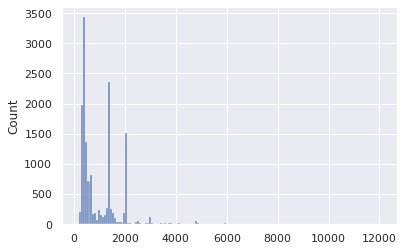

In [30]:
sns.histplot(heights_dist)

<AxesSubplot:ylabel='Count'>

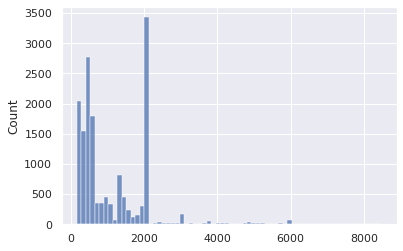

In [31]:
sns.histplot(widths_dist)

<AxesSubplot:ylabel='Count'>

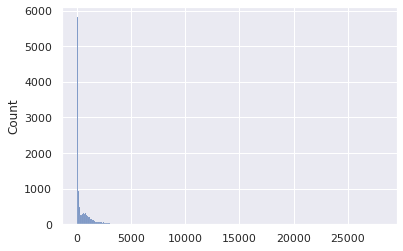

In [32]:
sns.histplot(size_dist)

# resizing images

In [33]:
import tqdm

In [36]:
size = 300, 400
for i in tqdm.tqdm(pathes):
    im = Image.open(i)
    try:
        im.thumbnail(size, Image.ANTIALIAS)
        im.save(i, "JPEG", quality=95)
    except:
        pass

 94%|█████████▍| 15018/16013 [03:32<00:14, 68.58it/s]/home/volodymyr/Parallel-emotional-intent-clustering/env/lib/python3.7/site-packages/PIL/Image.py:2850: DecompressionBombWarning: Image size (102273984 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
100%|██████████| 16013/16013 [03:51<00:00, 69.31it/s]


# data ordering

In [47]:
import numpy as np

In [53]:
pathes = [pathes[i:i+int(np.ceil(len(pathes)/4))] for i in range(0, len(pathes), int(np.ceil(len(pathes)/4)))]

In [54]:
[len(i) for i in pathes]

[4004, 4004, 4004, 4001]

In [55]:
import shutil

In [63]:
dir_names = ['Vova_0','Oleksii_0', 'Dima_Tar_0', 'Dima_Mal_0']
for dir_, chunk_path in zip(dir_names, pathes):
    dir_path = os.path.join('../data/imdb/',dir_)
    if not os.path.exists(dir_path):
        os.mkdir(dir_path)
    for path in chunk_path:
        shutil.move(path, os.path.join(dir_path,path.split('/')[-1]))